In [1]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.3 MB/s eta 0:00:00


In [2]:
!pip install nltk

In [3]:
!pip install wordcloud

In [4]:
# Import the pandas library and alias it as 'pd'
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Import the necessary libraries for data cleaning
import re  # Regular expressions library for text manipulation
from datetime import datetime  # Library for handling dates and times
import contractions
from google.colab import drive
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')
drive.mount('/content/drive')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mounted at /content/drive


In [5]:
df_all = pd.read_csv('/content/drive/My Drive/Datathon6/Paper_All_Diabetes.csv')

In [6]:
# Display the first few rows (head) of the DataFrame to inspect the data
df_all.head()

,Title,Abstracts,Discussion
0,Diagnosis and classification of diabetes melli...,New recommendations for the classification and...,The changes recommended by the expert committe...
1,Diabetes mellitus,Diabetes mellitus occurs commonly in the older...,NaN
2,Treatment and Diagnosis of Diabetes Mellitus a...,Diabetes mellitus and its complications became...,NaN
3,"Diabetes mellitus: an overview of the types, s...",The incidence of diabetes mellitus is rapidly ...,NaN
4,Treatment Goals in Diabetes,The quality of glycaemic control in diabetes m...,NaN


In [7]:
# Define a cleaning function that will replace the incorrectly encoded characters.
def clean_encoding(text):
    # Replace the incorrect character sequences with the correct character.
    # You can chain multiple replace calls to handle different cases.
    text = text.replace('¡¯', "'")  # Replace the sequence that represents a single quote
    # Add additional replacements here if there are other encoding issues
    return text

# First, we need to fill NA with empty string this will avoid many issues in our
# program.
df_all = df_all.fillna('')
# replace the incorrectly encoded characters.
df_all['Title'] = df_all['Title'].apply(clean_encoding)
df_all['Abstracts'] = df_all['Abstracts'].apply(clean_encoding)
df_all['Discussion'] = df_all['Discussion'].apply(clean_encoding)
df_all.head()

,Title,Abstracts,Discussion
0,Diagnosis and classification of diabetes melli...,New recommendations for the classification and...,The changes recommended by the expert committe...
1,Diabetes mellitus,Diabetes mellitus occurs commonly in the older...,
2,Treatment and Diagnosis of Diabetes Mellitus a...,Diabetes mellitus and its complications became...,
3,"Diabetes mellitus: an overview of the types, s...",The incidence of diabetes mellitus is rapidly ...,
4,Treatment Goals in Diabetes,The quality of glycaemic control in diabetes m...,


In [8]:
# Expand contractions in all three columns
df_all['Title'] = df_all['Title'].apply(lambda x: contractions.fix(x))
df_all['Abstracts'] = df_all['Abstracts'].apply(lambda x: contractions.fix(x))
df_all['Discussion'] = df_all['Discussion'].apply(lambda x: contractions.fix(x))
df_all.head()

,Title,Abstracts,Discussion
0,Diagnosis and classification of diabetes melli...,New recommendations for the classification and...,The changes recommended by the expert committe...
1,Diabetes mellitus,Diabetes mellitus occurs commonly in the older...,
2,Treatment and Diagnosis of Diabetes Mellitus a...,Diabetes mellitus and its complications became...,
3,"Diabetes mellitus: an overview of the types, s...",The incidence of diabetes mellitus is rapidly ...,
4,Treatment Goals in Diabetes,The quality of glycaemic control in diabetes m...,


Text Data Standardization



In [9]:
# Let's perform some basic data cleaning tasks such as:
# - Converting the date column to datetime
# - Lowercasing the tweet texts
# - Removing URLs
# - Removing Twitter handles
# - Removing special characters and numbers
# - Correcting the spelling of "Neutral" in Emotion column

# - Here I am also considering if there is any need to remove some
# term such as Summary, Abstracts, Conclusion,... Because these words
# are not real context in papers but only to represent a certain section

# Function to remove URLs
def remove_url(text):
    return re.sub(r'http\S+', '', text)

# Function to remove some handles
def remove_handle(text):
    return re.sub(r'@\w+', '', text)

# Function to remove special characters and numbers
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

# Perform the data cleaning
df_all['Title'] = df_all['Title'].str.lower()
df_all['Abstracts'] = df_all['Abstracts'].str.lower()
df_all['Discussion'] = df_all['Discussion'].str.lower()

df_all['Title'] = df_all['Title'].apply(remove_url)
df_all['Abstracts'] = df_all['Abstracts'].apply(remove_url)
df_all['Discussion'] = df_all['Discussion'].apply(remove_url)

df_all['Title'] = df_all['Title'].apply(remove_handle)
df_all['Abstracts'] = df_all['Abstracts'].apply(remove_handle)
df_all['Discussion'] = df_all['Discussion'].apply(remove_handle)

df_all['Title'] = df_all['Title'].apply(remove_special_characters)
df_all['Abstracts'] = df_all['Abstracts'].apply(remove_special_characters)
df_all['Discussion'] = df_all['Discussion'].apply(remove_special_characters)

df_all.head()

,Title,Abstracts,Discussion
0,diagnosis and classification of diabetes melli...,new recommendations for the classification and...,the changes recommended by the expert committe...
1,diabetes mellitus,diabetes mellitus occurs commonly in the older...,
2,treatment and diagnosis of diabetes mellitus a...,diabetes mellitus and its complications became...,
3,diabetes mellitus an overview of the types sym...,the incidence of diabetes mellitus is rapidly ...,
4,treatment goals in diabetes,the quality of glycaemic control in diabetes m...,


Tokenization

In [10]:
def tokenize_text(text):
   return word_tokenize(text)

df_all['Title_tokens'] = df_all['Title'].apply(tokenize_text)
df_all['Abstracts_tokens'] = df_all['Abstracts'].apply(tokenize_text)
df_all['Discussion_tokens'] = df_all['Discussion'].apply(tokenize_text)

df_all.head()

,Title,Abstracts,Discussion,Title_tokens,Abstracts_tokens,Discussion_tokens
0,diagnosis and classification of diabetes melli...,new recommendations for the classification and...,the changes recommended by the expert committe...,"[diagnosis, and, classification, of, diabetes,...","[new, recommendations, for, the, classificatio...","[the, changes, recommended, by, the, expert, c..."
1,diabetes mellitus,diabetes mellitus occurs commonly in the older...,,"[diabetes, mellitus]","[diabetes, mellitus, occurs, commonly, in, the...",[]
2,treatment and diagnosis of diabetes mellitus a...,diabetes mellitus and its complications became...,,"[treatment, and, diagnosis, of, diabetes, mell...","[diabetes, mellitus, and, its, complications, ...",[]
3,diabetes mellitus an overview of the types sym...,the incidence of diabetes mellitus is rapidly ...,,"[diabetes, mellitus, an, overview, of, the, ty...","[the, incidence, of, diabetes, mellitus, is, r...",[]
4,treatment goals in diabetes,the quality of glycaemic control in diabetes m...,,"[treatment, goals, in, diabetes]","[the, quality, of, glycaemic, control, in, dia...",[]


In [11]:
# Import the 'stopwords' corpus from the Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords

# Download the set of stopwords from NLTK. This is necessary the first time you run this code.
nltk.download('stopwords')

# Define a function that removes stop words from a list of tokens.
# Stop words are common words that are usually filtered out in NLP tasks.
def remove_stop_words(tokens):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))

    # Return a new list that contains only the tokens that are not stop words.
    # The token is also converted to lowercase to ensure case-insensitive matching.
    return [token for token in tokens if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'.
# The result is a new column 'tokens_no_stop' in the dataframe 'df_all'.
df_all['Title_tokens_no_stop'] = df_all['Title_tokens'].apply(remove_stop_words)
df_all['Abstracts_tokens_no_stop'] = df_all['Abstracts_tokens'].apply(remove_stop_words)
df_all['Discussion_tokens_no_stop'] = df_all['Discussion_tokens'].apply(remove_stop_words)
# Display the first few rows of the DataFrame showing the 'tweet', 'tokens', and 'tokens_no_stop' columns.
# This gives a visual comparison between the original tokens and the tokens after stop words removal.
df_all[['Title_tokens_no_stop', 'Abstracts_tokens_no_stop', 'Discussion_tokens_no_stop']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Title_tokens_no_stop,Abstracts_tokens_no_stop,Discussion_tokens_no_stop
0,"[diagnosis, classification, diabetes, mellitus...","[new, recommendations, classification, diagnos...","[changes, recommended, expert, committee, diag..."
1,"[diabetes, mellitus]","[diabetes, mellitus, occurs, commonly, older, ...",[]
2,"[treatment, diagnosis, diabetes, mellitus, com...","[diabetes, mellitus, complications, became, ep...",[]
3,"[diabetes, mellitus, overview, types, symptoms...","[incidence, diabetes, mellitus, rapidly, incre...",[]
4,"[treatment, goals, diabetes]","[quality, glycaemic, control, diabetes, mellit...",[]


In [12]:
df_all

,Title,Abstracts,Discussion,Title_tokens,Abstracts_tokens,Discussion_tokens,Title_tokens_no_stop,Abstracts_tokens_no_stop,Discussion_tokens_no_stop
0,diagnosis and classification of diabetes melli...,new recommendations for the classification and...,the changes recommended by the expert committe...,"[diagnosis, and, classification, of, diabetes,...","[new, recommendations, for, the, classificatio...","[the, changes, recommended, by, the, expert, c...","[diagnosis, classification, diabetes, mellitus...","[new, recommendations, classification, diagnos...","[changes, recommended, expert, committee, diag..."
1,diabetes mellitus,diabetes mellitus occurs commonly in the older...,,"[diabetes, mellitus]","[diabetes, mellitus, occurs, commonly, in, the...",[],"[diabetes, mellitus]","[diabetes, mellitus, occurs, commonly, older, ...",[]
2,treatment and diagnosis of diabetes mellitus a...,diabetes mellitus and its complications became...,,"[treatment, and, diagnosis, of, diabetes, mell...","[diabetes, mellitus, and, its, complications, ...",[],"[treatment, diagnosis, diabetes, mellitus, com...","[diabetes, mellitus, complications, became, ep...",[]
3,diabetes mellitus an overview of the types sym...,the incidence of diabetes mellitus is rapidly ...,,"[diabetes, mellitus, an, overview, of, the, ty...","[the, incidence, of, diabetes, mellitus, is, r...",[],"[diabetes, mellitus, overview, types, symptoms...","[incidence, diabetes, mellitus, rapidly, incre...",[]
4,treatment goals in diabetes,the quality of glycaemic control in diabetes m...,,"[treatment, goals, in, diabetes]","[the, quality, of, glycaemic, control, in, dia...",[],"[treatment, goals, diabetes]","[quality, glycaemic, control, diabetes, mellit...",[]
...,...,...,...,...,...,...,...,...,...
145,clinically relevant experimental rodent models...,chronic wounds are a substantial clinical prob...,animal models provide indispensable insight in...,"[clinically, relevant, experimental, rodent, m...","[chronic, wounds, are, a, substantial, clinica...","[animal, models, provide, indispensable, insig...","[clinically, relevant, experimental, rodent, m...","[chronic, wounds, substantial, clinical, probl...","[animal, models, provide, indispensable, insig..."
146,the prime diabetes model novel methods for est...,recent publications describing longterm follow...,the prime diabetes model has been developed on...,"[the, prime, diabetes, model, novel, methods, ...","[recent, publications, describing, longterm, f...","[the, prime, diabetes, model, has, been, devel...","[prime, diabetes, model, novel, methods, estim...","[recent, publications, describing, longterm, f...","[prime, diabetes, model, developed, basis, sys..."
147,a mathematical model of the pathogenesis preve...,type diabetes td is generally thought to resu...,,"[a, mathematical, model, of, the, pathogenesis...","[type, diabetes, td, is, generally, thought, t...",[],"[mathematical, model, pathogenesis, prevention...","[type, diabetes, td, generally, thought, resul...",[]
148,development of a predictive model for symptoma...,in evaluating therapeutic interventions aimed ...,several of the neurologic indices considered h...,"[development, of, a, predictive, model, for, s...","[in, evaluating, therapeutic, interventions, a...","[several, of, the, neurologic, indices, consid...","[development, predictive, model, symptomatic, ...","[evaluating, therapeutic, interventions, aimed...","[several, neurologic, indices, considered, pre..."


In [50]:
# Define additional context-sensitive stop words
context_sensitive_stop_words = set(['diabetes', 'mellitus', 'glycaemic', 'type',
                                    'diagnosis', 'types', 'patient', 'model',
                                    'prediction','study', 'diabetic', 'predicting',
                                    'using', 'classification', 'models', 'patients',
                                    'research', 'risk', 'clinical', 'risk factor',
                                    'factor', 'validation', 'studies', 'disease',
                                    'factors', 'method','treatment','result','data',
                                    'complication', 'complications', 'results',
                                    'associated','used','may','methods', 'et', 'al',
                                    'showed', 'based','among','based','one','found',
                                    'use','finding', 'present','conclusion','outcome',
                                    'thus','include', 'year', 'years', 'develop', 'includes',
                                    'including'])

# English stop words
stop_words_set = set(stopwords.words('english'))

# Extend the previously defined function to remove both general and context-sensitive stop words
def remove_context_sensitive_stop_words(tokens):
    # Combine the general English stop words with the context-specific stop words
    # to create a comprehensive set of words to filter out.
    all_stop_words = stop_words_set | context_sensitive_stop_words
    return [token for token in tokens if token.lower() not in all_stop_words]

# Apply the updated function to remove both general and context-sensitive stop words
df_all['Title_tokens_no_stop'] = df_all['Title_tokens'].apply(remove_context_sensitive_stop_words)
df_all['Abstracts_tokens_no_stop'] = df_all['Abstracts_tokens'].apply(remove_context_sensitive_stop_words)
df_all['Discussion_tokens_no_stop'] = df_all['Discussion_tokens'].apply(remove_context_sensitive_stop_words)


# Display the DataFrame
df_all[['Title_tokens_no_stop', 'Abstracts_tokens_no_stop', 'Discussion_tokens_no_stop']].head()

,Title_tokens_no_stop,Abstracts_tokens_no_stop,Discussion_tokens_no_stop
0,"[new, criteria]","[new, recommendations, preferred, terms, inste...","[changes, recommended, expert, committee, prov..."
1,[],"[occurs, commonly, older, frequently, undiagno...",[]
2,"[advanced, approaches]","[became, epidemic, posses, serious, challenge,...",[]
3,"[overview, symptoms, management]","[incidence, rapidly, increasing, condition, of...",[]
4,[goals],"[quality, control, relies, accurate, individua...",[]


In [48]:
for i in range(150):
  print(df_all['Discussion_tokens'][i])

['the', 'changes', 'recommended', 'by', 'the', 'expert', 'committee', 'for', 'the', 'diagnosis', 'of', 'diabetes', 'mellitus', 'should', 'prove', 'beneficial', 'to', 'patients', 'measurement', 'of', 'fasting', 'plasma', 'glucose', 'levels', 'should', 'be', 'more', 'acceptable', 'to', 'patients', 'than', 'the', 'oral', 'glucose', 'tolerance', 'test', 'and', 'can', 'be', 'readily', 'incorporated', 'with', 'fasting', 'lipid', 'determinations', 'identifying', 'asymptomatic', 'persons', 'earlier', 'in', 'the', 'disease', 'process', 'will', 'allow', 'earlier', 'institution', 'of', 'lifestyle', 'changes', 'and', 'medical', 'therapy', 'that', 'may', 'decrease', 'the', 'complications', 'of', 'hyperglycemia', 'the', 'national', 'diabetes', 'data', 'group', 'emphasizes', 'that', 'these', 'changes', 'in', 'diagnostic', 'criteria', 'have', 'not', 'changed', 'the', 'treatment', 'goals', 'in', 'patients', 'with', 'diabetes', 'mellitus', 'these', 'goals', 'include', 'maintaining', 'a', 'fasting', 'pla

Lemmatization

In [51]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens with POS tags
def lemmatize_tokens_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]

# Apply this function to the 'tokens' column
df_all['Title_tokens_lemmatized'] = df_all['Title_tokens_no_stop'].apply(lemmatize_tokens_with_pos)
df_all['Abstracts_tokens_lemmatized'] = df_all['Abstracts_tokens_no_stop'].apply(lemmatize_tokens_with_pos)
df_all['Discussion_tokens_lemmatized'] = df_all['Discussion_tokens_no_stop'].apply(lemmatize_tokens_with_pos)

# Display the DataFrame
df_all[['Title_tokens_lemmatized', 'Abstracts_tokens_lemmatized', 'Discussion_tokens_lemmatized']].head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Title_tokens_lemmatized,Abstracts_tokens_lemmatized,Discussion_tokens_lemmatized
0,"[new, criterion]","[new, recommendation, prefer, term, instead, i...","[change, recommend, expert, committee, prove, ..."
1,[],"[occurs, commonly, older, frequently, undiagno...",[]
2,"[advanced, approach]","[become, epidemic, posse, serious, challenge, ...",[]
3,"[overview, symptom, management]","[incidence, rapidly, increase, condition, ofte...",[]
4,[goal],"[quality, control, rely, accurate, individuali...",[]


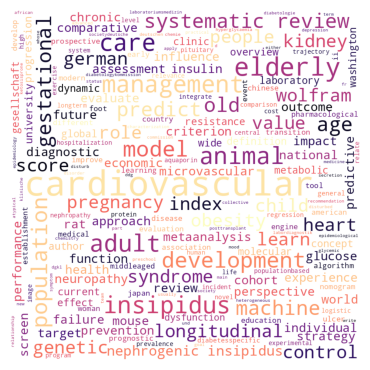

In [52]:
# Combine all tokens from the 'Title_tokens_no_stop' column into a single list
Title_tokens = sum(df_all['Title_tokens_lemmatized'].tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(Title_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

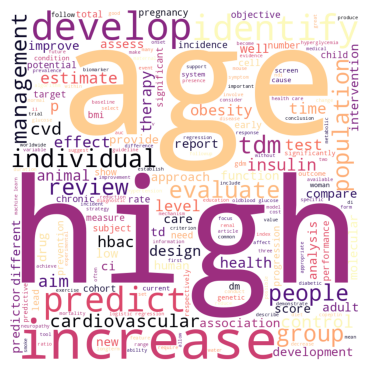

In [53]:
# Combine all tokens from the 'Abstracts_tokens_no_stop' column into a single list
Abstracts_tokens = sum(df_all['Abstracts_tokens_lemmatized'].tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(Abstracts_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

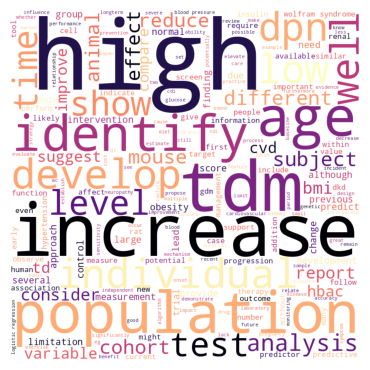

In [54]:
# Combine all tokens from the 'Discussion_tokens_no_stop' column into a single list
Discussion_tokens = sum(df_all['Discussion_tokens_lemmatized'].tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(Discussion_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()